In [95]:
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from iexfinance.refdata import get_symbols
%matplotlib inline

In [96]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [100]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [127]:
list_of_tickers = ["SPY", "AGG"]
end_date = datetime.now()
start_date = end_date + timedelta(-365)
iex_token = os.getenv("IEX_TOKEN")
tickers=pd.DataFrame(get_symbols(output_format='pandas', token=iex_token))
tickers.head()

,symbol,exchange,name,date,type,iexId,region,currency,isEnabled
0,A,NYS,Agilent Technologies Inc.,2019-10-01,cs,IEX_46574843354B2D52,US,USD,True
1,AA,NYS,Alcoa Corp.,2019-10-01,cs,IEX_4238333734532D52,US,USD,True
2,AAAU,PSE,Perth Mint Physical Gold ETF,2019-10-01,et,IEX_474B433136332D52,US,USD,True
3,AABA,NAS,Altaba Inc.,2019-10-01,cef,IEX_4E5434354A302D52,US,USD,True
4,AAC,NYS,AAC Holdings Inc.,2019-10-01,cs,IEX_4843364642592D52,US,USD,True


In [128]:
df = get_historical_data(list_of_tickers, start_date, end_date,  output_format='pandas')
df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2018-10-01  292.11  292.93  290.98  291.73   62078937  105.35  105.35  105.20   
2018-10-02  291.56  292.36  291.14  291.56   47258227  105.32  105.46  105.25   
2018-10-03  292.74  293.21  291.32  291.72   64694594  105.22  105.24  104.75   
2018-10-04  291.18  291.24  287.66  289.44  111545910  104.65  104.72  104.47   
2018-10-05  289.69  290.27  286.22  287.82  105951698  104.46  104.48  104.19   

                             
             close   volume  
date                         
2018-10-01  105.24  3517615  
2018-10-02  105.36  6912595  
2018-10-03  104.86  2540483  
2018-10-04  104.56  5268197  
2018-10-05  104.33  3460512

In [129]:
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.tail()

,SPY,AGG
,close,close
date,,
2019-09-24,295.87,113.28
2019-09-25,297.62,112.81
2019-09-26,297.00,113.00
2019-09-27,295.40,113.14
2019-09-30,296.77,113.17


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [130]:
# Calculate the daily roi for the stocks
daily_returns = df.pct_change()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2018-10-01,NaN,NaN
2018-10-02,-0.000583,0.001140
2018-10-03,0.000549,-0.004746
2018-10-04,-0.007816,-0.002861
2018-10-05,-0.005597,-0.002200


In [131]:
avg_daily_return_SPY = daily_returns.mean()['SPY']['close']
avg_daily_return_AGG = daily_returns.mean()['AGG']['close']
avg_daily_return_AGG
avg_daily_return_SPY

0.00012473913038652017

In [132]:
# Calculate volatility
std_dev_daily_return_SPY = daily_returns.std()['SPY']['close']
std_dev_daily_return_AGG = daily_returns.std()['AGG']['close']
std_dev_daily_return_AGG

0.0019596660724796587

In [133]:
# Save the last day's closing price
SPY_last_price = df['SPY']['close'][-1]
AGG_last_price = df['AGG']['close'][-1]
print(AGG_last_price)
print(SPY_last_price)

113.17
296.77


In [134]:
# Setup the Monte Carlo Parameters
num_simulations = 500
number_records = 252 * 30
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [135]:
# Run the Monte Carlo Simulation
for n in range(num_simulations):

    
    simulated_SPY_prices = [SPY_last_price]
    simulated_AGG_prices = [AGG_last_price]
    
    
    for i in range(number_records):
        
        
        simulated_SPY_price = simulated_SPY_prices[-1] * (1 + np.random.normal(avg_daily_return_SPY, std_dev_daily_return_SPY))
        simulated_AGG_price = simulated_AGG_prices[-1] * (1 + np.random.normal(avg_daily_return_AGG, std_dev_daily_return_AGG))
        
        
        simulated_SPY_prices.append(simulated_SPY_price)
        simulated_AGG_prices.append(simulated_AGG_price)
    
    
    simulated_price_df["SPY prices"] = pd.Series(simulated_SPY_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_AGG_prices)
    
    
    simulated_daily_returns = simulated_price_df.pct_change()
    
    
    weights = [0.60, 0.40]

    
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()


portfolio_cumulative_returns.head(10)    

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001693,1.000057,0.994713,0.999211,1.003744,0.995083,0.998551,1.007589,1.008237,1.008539,...,0.988051,1.007154,1.006862,0.995760,0.995499,1.001701,1.017162,1.001976,0.995953,0.995949
2,0.997089,0.989707,0.991446,0.995928,1.013949,0.994821,0.993967,1.008987,1.023269,1.008628,...,0.980695,1.009313,1.015577,0.988437,1.001539,1.000983,1.017891,1.007255,1.003492,0.997055
3,0.994468,0.988232,0.990006,0.992802,1.013538,0.998321,0.998855,1.006132,1.031588,1.009648,...,0.977394,1.011646,1.021887,0.985827,0.994092,1.011009,1.022053,1.004481,1.007686,0.997696
4,0.996878,0.988057,0.996980,1.000744,1.013448,1.007315,0.998970,1.011218,1.034125,1.006771,...,0.969742,0.999728,1.021018,0.981049,0.993180,1.008778,1.022503,1.000465,0.996183,0.993766
5,1.004821,0.985664,0.991924,0.997470,1.014278,1.004606,1.008694,1.027038,1.030636,0.998458,...,0.974398,0.989147,1.018166,0.978222,0.997033,1.002237,1.025125,0.996249,0.998218,0.983829
6,1.011225,0.983438,0.986363,0.999443,1.019798,1.008735,1.011882,1.035035,1.028045,1.001883,...,0.974100,0.992500,1.016905,0.988951,0.991997,1.002523,1.021374,0.997121,0.989192,0.988006
7,1.020516,0.974932,0.983686,1.007966,1.020376,1.010928,1.015032,1.044188,1.027153,1.004608,...,0.974123,0.998417,1.010030,0.994756,1.004335,0.992106,1.023948,0.998136,0.999375,0.984849
8,1.023726,0.969852,0.984203,1.005921,1.014140,1.012463,1.014666,1.044707,1.039160,0.999904,...,0.962031,0.990395,1.012780,0.990656,0.999975,0.999510,1.015138,1.004872,0.996824,0.981424
9,1.021964,0.961160,0.988536,1.002375,1.014146,1.009474,1.009749,1.056268,1.028886,1.004524,...,0.967442,0.991621,1.017978,0.993203,1.009596,0.995251,1.016560,0.996871,0.987132,0.989224


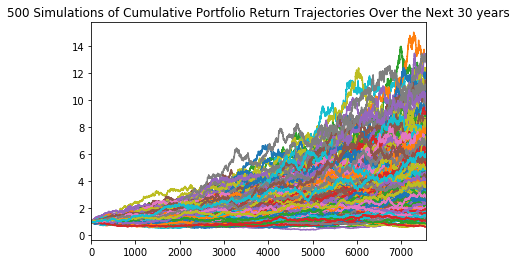

In [136]:
# Visualize the Simulation
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [137]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns_30 = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns_30.tail()

495    5.804826
496    2.855022
497    3.668659
498    3.678076
499    5.999579
Name: 7560, dtype: float64

In [140]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns_20 = portfolio_cumulative_returns.iloc[5039]
ending_cumulative_returns_20.head()

0    3.321221
1    1.622010
2    6.502571
3    2.850086
4    2.405290
Name: 5039, dtype: float64

In [139]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns_30.quantile(q=[0.05, 0.95])
confidence_interval

0.05    1.368476
0.95    8.414893
Name: 7560, dtype: float64

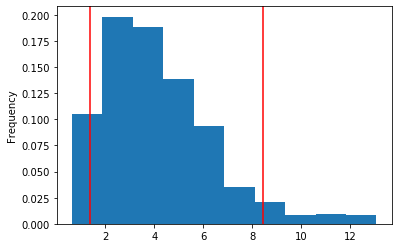

In [141]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns_30.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [142]:
cu_ret_30_10th = ending_cumulative_returns_30.quantile(q=0.10)
cu_ret_20_10th=ending_cumulative_returns_20.quantile(q=0.10)
print(f"Expected cumulative returns at 30 years for the 10th percentile {cu_ret_30_10th}")

Expected cumulative returns at 30 years for the 10th percentile 1.6377228612969736


In [143]:
cu_ret_30_50th=ending_cumulative_returns_30.quantile(q=0.5)
print(f"Expected cumulative returns at 30 years for the 50th percentile {cu_ret_30_50th}")


Expected cumulative returns at 30 years for the 50th percentile 3.7765701646226226


In [144]:
cu_ret_30_90th=ending_cumulative_returns_30.quantile(q=0.9)
print(f"Expected cumulative returns at 30 years for the 90th percentile {cu_ret_30_90th}")


Expected cumulative returns at 30 years for the 90th percentile 6.88829773148299


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [146]:
# YOUR CODE HERE
initial_investment = 20000
expect_ret_10th = initial_investment + (initial_investment * cu_ret_30_10th)
print(f"Expected portfolio return at the 10th, initial investment of $20,000 is =  ${expect_ret_10th}")

Expected portfolio return at the 10th, initial investment of $20,000 is =  $52754.45722593948


In [147]:
expect_ret_50th = initial_investment + (initial_investment * cu_ret_30_50th)
print(f"Expected portfolio return at the 50th, initial investment of $20,000 is =  ${expect_ret_50th}")

Expected portfolio return at the 50th, initial investment of $20,000 is =  $95531.40329245245


In [148]:
expect_ret_90th = initial_investment + (initial_investment * cu_ret_30_90th)
print(f"Expected portfolio return at the 90th, initial investment of $20,000 is =  ${expect_ret_90th}")

Expected portfolio return at the 90th, initial investment of $20,000 is =  $157765.9546296598


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [149]:
expect_ret_10th_20=initial_investment + (initial_investment * cu_ret_20_10th)
income_retirement_20 = expect_ret_10th_20*0.04
print(f"With 4% withdraw rate from the retirement portfolio, projected retirement annual income  ${income_retirement_20}, which is bigger than projected year income of $6085  ")

With 4% withdraw rate from the retirement portfolio, projected retirement annual income  $1913.6860494840018, which is bigger than projected year income of $6085  


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [150]:
expect_ret_10th_20_50perc=initial_investment*1.5 + (initial_investment*1.5 * cu_ret_20_10th)
income_retirement_20_50perc = expect_ret_10th_20_50perc*0.04
print(f"A 50% increase in the initial investment would generate a projected retirement annual income of ${income_retirement_20_50perc}. Which is bigger than the projected ${income_retirement_20}")

A 50% increase in the initial investment would generate a projected retirement annual income of $2870.529074226003. Which is bigger than the projected $1913.6860494840018


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [151]:
cu_ret_5_df = pd.Series()
cu_ret_50_df = pd.Series()
cu_ret_95_df = pd.Series()
cu_ret_5_l = []
cu_ret_50_l = []
cu_ret_95_l = []
for num in range(0,7560):
    ecu = portfolio_cumulative_returns.iloc[num]
    cu_ret_5 = ecu.quantile(q=0.05)
    cu_ret_50 = ecu.quantile(q=0.5)
    cu_ret_95 = ecu.quantile(q=0.95)
    cu_ret_5_l.append(cu_ret_5)
    cu_ret_50_l.append(cu_ret_50)
    cu_ret_95_l.append(cu_ret_95)
    cu_ret_5_df=pd.DataFrame(cu_ret_5_l,columns=['5th'])
    cu_ret_50_df=pd.DataFrame(cu_ret_50_l,columns=['50th'])
    cu_ret_95_df=pd.DataFrame(cu_ret_95_l,columns=['95th'])

In [152]:
challenge_df = pd.concat([cu_ret_5_df, cu_ret_50_df,cu_ret_95_df],sort=False)

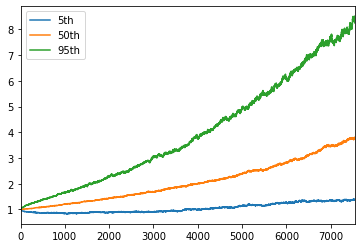

In [153]:
challenge_df.plot()